sns 그래프, x ,y값 각각 할당해주면 data를 지정한다.(barplot, catplot...)
distplot같은 data['col1'] 같이 x, y를 따로지정하지 않는 그래프는 data 인자설정 X

tukey method로 이상치 탐지하기
- np.percentile(data, 25) -> 데이터에서 하위 25% 값을 반환

collections.Counter - 리스트 원소 개수 세서 원소(키) : 개수(밸류) 딕셔너리로 반환
- Counter.update() : 카운터로 구한 기존 딕셔너리에 업데이트

sns.despine(방향=True) : 축을 삭제한다.

FacetGrid로 원하는 컬럼 별로 데이터 살펴보기
<- 기존에는 f, ax = plt.subplots(1, 2, figsize=(12,8)) 과 같이 길게 씀.

np.isnan(data) - data(array)가 NaN인지 확인

pd.isnull(data) - Series데이터가 null인지 확인

plt.setp로 피규어 선 모양 다루기

isdigit() - '문자열'이 숫자인지 문자인지 확인한다.
**{'xerr':cv_std}) - 그래프에 에러바를 추가한다. **은 키워드 인자.

learning_curve로 학습곡선을 그려보자. (학습 데이터와 정확도에 관한 그래프)
- train_sizes
- train_scores
- test_scores
를 리턴한다. 추가적으로 학습 시간도 반환하지만 따로 설정해야 한다.

np.argsort - 작은 값부터 순서대로 데이터의 인덱스를 반환한다.

#### 필요한 데이터와 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [2]:
train = pd.read_csv('c:/data/titanic/train.csv')
test = pd.read_csv('c:/data/titanic/test.csv')
IDtest = test['PassengerId']

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### trainset 이상치 탐지 - Tukey method
- IQR = 3분위수 - 1분위수
일 때, (Q1 - 1.5*IQR)보다 작거나, (Q3 + 1.5*IQR) 보다 큰 데이터에 대해서 이상치로 간주한다.
- 수치형 자료에 대해서 이상치를 탐지해보도록 한다.

- collections 라이브러리의 Counter메소드는 인자로 받은 리스트의 원소를 키로, 개수를 밸류로 하는 딕셔너리로 반환한다.

In [5]:
# 데이터프레임, 살펴볼 피쳐, 개수를 입력하면 이상치의 인덱스를 리턴하는 함수를 만든다.
def detect_outliers(df, n, features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5*IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        # outlier_list_col 은 조건에 맞는 인덱스 번호 리턴
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)
    # 탐지된 이상치가 n개 이상인 샘플에 대한 인덱스 리스트를 만든다.
    return multiple_outliers

In [6]:
Outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])

In [7]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [8]:
# 탐지한 이상값을 drop한다.
train = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)

In [9]:
# 범주형 변수 변환시 같은 수치를 얻기 위해서 트레이닝/테스트 데이터를 합쳐준다.
# 합친 데이터를 분리할 때, 미리 설정해놓은 훈련데이터의 수만큼 분할할 수 있도록 훈련데이터의 개수를 저장해놓는다.
train_len = len(train)
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

#### 결측치와 널값 체크

In [10]:
dataset = dataset.fillna(np.nan)

dataset.isnull().sum()

# testset의 Survived 열은 없었기 때문에 testset에 결측치는 무시한다.

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [11]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Feature analysis

#### 수치형 자료
- 먼저 수치형 자료들에 대해서 종합적으로 종속변수(Survived)와의 상관계수를 살펴본다.
- 그 다음으로 변수 하나하나씩 종속변수와 함께 살펴본다.

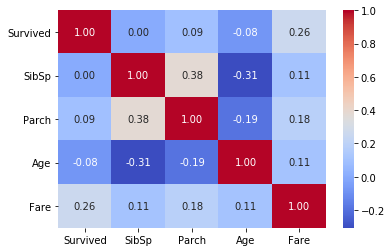

In [13]:
g = sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt = '.2f', cmap='coolwarm')
# fare가 다른 피쳐들에 비해 상관계수가 높다.

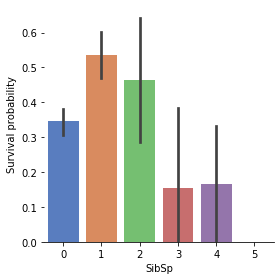

In [14]:
# SibSp
g = sns.catplot(x = 'SibSp', y='Survived',data=train,kind='bar', height=4, palette = 'muted')

g.despine(left=True)
g = g.set_ylabels('Survival probability')

- SibSp의 수가 많을수록 생존률이 떨어지는 듯 보인다.
- 0~2의 수를 가질 때 생존률이 높다.

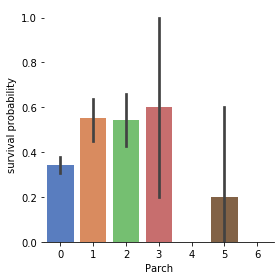

In [15]:
#Parch
g = sns.catplot(x = 'Parch', y= 'Survived', data =train, kind='bar', height= 4, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('survival probability')

- 가족의 수가 적을수록 생존률이 높은 경향이 있다.
- 수치 3에 표준편차가 크다.

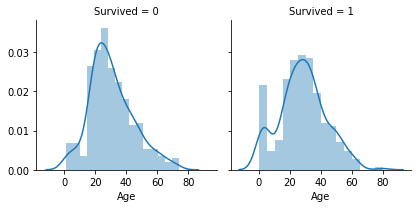

In [16]:
# Age
g = sns.FacetGrid(train, col = 'Survived')
g = g.map(sns.distplot, 'Age')

- 나이 분포는 생존의 클래스마다 다른 양상을 보인다. 60-80세의 경우, 생존률이 낮았고 어린 승객의 경우 생존률이 높았음을 확인할 수 있다.

- 위 상관계수 히트맵에서 나이가 생존과 관련이 크게 없었다고 해도(-0.08) 특정 나이 범주에서 생존을 더/덜한 케이스를 위의 분포로 확인할 수 있다.

- 매우 어린 승객은 생존률이 높았다.

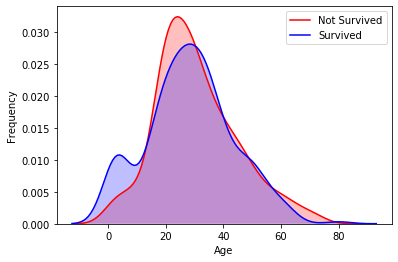

In [17]:
# 나이 분포 살펴보기
# 생존의 두 경우를 결측치가 없는 데이터들을 대상으로 살펴보자.
g = sns.kdeplot(train['Age'][(train['Survived']==0)&(train['Age'].notnull())], color='Red', shade=True)
g = sns.kdeplot(train['Age'][(train['Survived']==1)&(train['Age'].notnull())], color = 'Blue', shade=True)

g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

나이와 생존의 분포를 포개 살펴봤을 때 명확하게 차이를 파악할 수 있다.

In [18]:
# Fare
dataset['Fare'].isnull().sum()

1

In [19]:
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

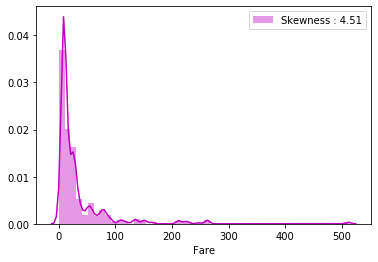

In [20]:
g = sns.distplot(dataset['Fare'], color = 'm', label = 'Skewness : %.2f'%dataset['Fare'].skew())
g = g.legend(loc='best')

fare의 분포는 굉장히 왜도가 높다. 이와같은 경우, 왜도를 줄이기 위해 로그 변환을 해주는 것이 좋다.

In [21]:
dataset['Fare'] = dataset['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

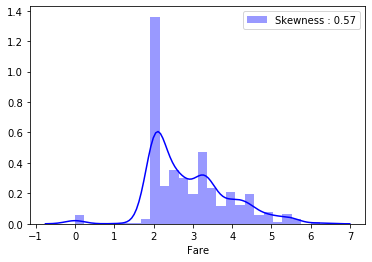

In [22]:
g = sns.distplot(dataset['Fare'], color = 'b', label = 'Skewness : %.2f'%(dataset['Fare'].skew()))
g.legend(loc='best')

### 범주형 변수 살펴보기

#### Sex

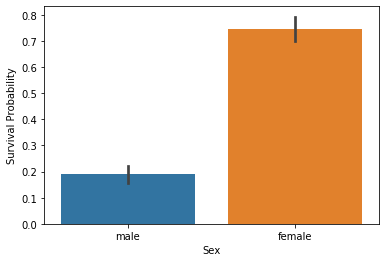

In [23]:
g = sns.barplot(x = 'Sex', y = 'Survived', data = train)
g = g.set_ylabel('Survival Probability')

In [24]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


- 남성이 여성보다 생존률이 낮은 것이 자명하다.
- Sex 피쳐는 생존 예측에 중요한 변수일 것이다.

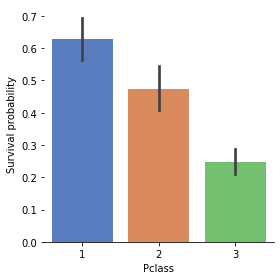

In [25]:
# Pclass
g = sns.catplot(x='Pclass', y='Survived', data = train, kind='bar', height = 4, palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Survival probability')

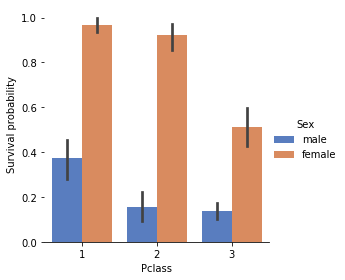

In [26]:
# Sex 별로 살펴보기
g = sns.catplot(x='Pclass', y = 'Survived', hue = 'Sex', data = train, height = 4, kind = 'bar', palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Survival probability')

- 생존률이 클래스별로 다르다. 클래스가 내려갈수록 생존률이 낮아진다.(남녀 상관 없이)
- 위에서 살펴봤던 남녀간 생존률 차이가 그대로 보여진다.

In [27]:
# Embarked
dataset['Embarked'].isnull().sum()

2

In [28]:
dataset['Embarked'].value_counts()

S    904
C    270
Q    123
Name: Embarked, dtype: int64

In [29]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

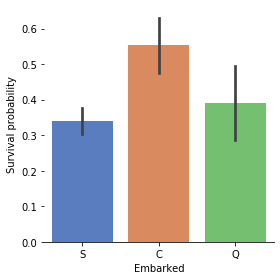

In [30]:
g = sns.catplot(x= 'Embarked', y= 'Survived', data = train, height = 4, kind = 'bar', palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Survival probability')

- C 선착장에서 탄 승객들이 생존률이 더 높게 나타난다.
- C에 탄 사람들이 높은 클래스의 티켓을 가진 승객일 것이라는 가정을 해보자. (C - Q - S 순)

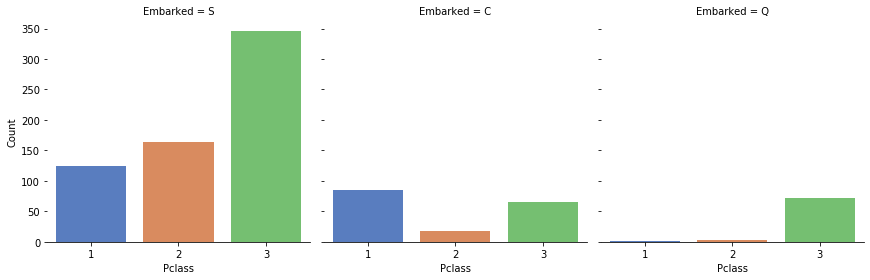

In [31]:
g = sns.catplot('Pclass',col = 'Embarked', data = train, height=4, kind = 'count', palette = 'muted')
g.despine(left=True)
g = g.set_ylabels('Count')

- S에 3등석 승객이 굉장히 많은 것을 알 수 있다. 이에반해 C에는 1등석 승객이 상대적으로 많다. Q는 대부분이 3등석이다.(그러나 S에 3등석 승객이 굉장히 많으므로 생존률이 낮은 것 같다.

### 결측치 다루기
- Age의 결측치를 채우기 전에, 위에서 살펴본 age 피쳐의 분포를 떠올려보자.(어리면 생존률이 높고 나이가 많으면 생존률이 낮았다) 
- 나이 구간에 따른 특성이 존재했으므로, 이 특성을 그대로 살려야 한다.
    - 나이와 연관된 피쳐를 찾아서 그 피쳐들이 가진 특성에 따라 나이를 추정할 것이다.

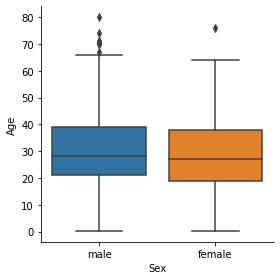

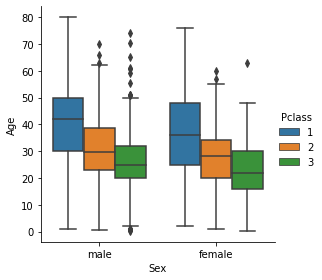

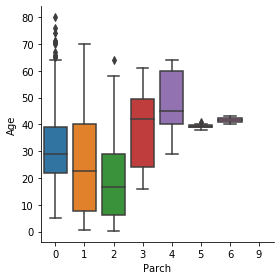

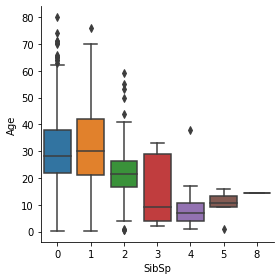

In [32]:
# Age와 연관이 있어보이는 다른 변수들을 함께 고려해보자.

g = sns.catplot(y='Age',x='Sex',data=dataset,kind='box', height=4)
g = sns.catplot(y='Age',x='Sex',hue='Pclass',data = dataset, kind='box', height=4)
g = sns.catplot(y='Age',x='Parch',data = dataset, kind='box', height=4)
g = sns.catplot(y='Age',x='SibSp',data = dataset, kind='box', height=4)

- 성별에 따른 나이 분포는 비슷하다.
- 클래스가 낮아질수록 나이가 어려진다.
- 자녀/부모가 많을수록 나이가 많다
- 형제/배우자가 많을수록 나이가 어리다.

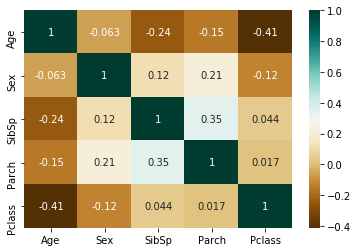

In [33]:
# 성별을 숫자로 바꿔주자.
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})

g = sns.heatmap(dataset[['Age','Sex','SibSp','Parch','Pclass']].corr(), cmap='BrBG', annot = True)

위에서 Age와 SibSp, Parch, Pclass가 연관되어있다고 파악했으므로, 이 피쳐들이 공유하는 나이대로 나이를 추정할 것이다.(위에서 나이 구간마다 차이를 보이므로 그 특성을 유지하며 결측치를 처리하기 위해)
- 결측값인 승객과 SibSp, Parch, Pclass가 같은 다른 승객의 나이의 중위수로 결측값을 처리할 것.
    - dataset['SibSp'] == dataset.iloc[0]['SibSp'] 은 조건에 맞는 **행**에 True를 반환한다.

In [34]:
index_NaN_age = list(dataset['Age'][dataset['Age'].isnull()].index)
# Age가 결측치인 샘플의 인덱스를 얻는다.
for i in index_NaN_age:
    age_med = dataset['Age'].median()
    age_pred = dataset['Age'][((dataset['SibSp'] == dataset.iloc[i]['SibSp'])&\
                               (dataset['Parch']==dataset.iloc[i]['Parch'])&\
                               (dataset['Pclass']==dataset.iloc[i]['Pclass']))].median()
    
    if not np.isnan(age_pred): 
        dataset['Age'].iloc[i] = age_pred
    else: # 나이가 결측값인 사람의 위 세 피쳐들 역시 결측값이면 전체 나이의 평균으로 대치
        dataset['Age'].iloc[i] = age_med

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


dataset['Age'][((dataset['SibSp'] == dataset.iloc[i]['SibSp'])  
- 형제, 배우자의 수가, 나이가 결측값인 사람과 같은 행의 Age를 가져온다.

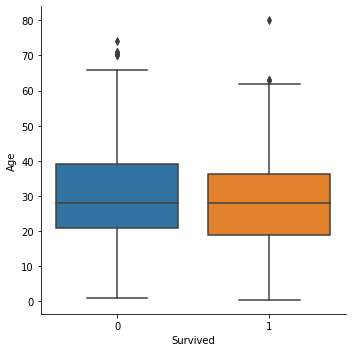

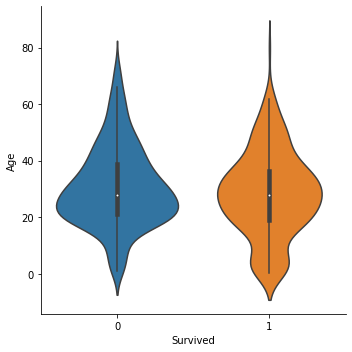

In [35]:
g = sns.catplot(x='Survived', y='Age',data = train, kind='box')
g = sns.catplot(x='Survived', y='Age',data = train, kind='violin')

전체적인 분포를 해치지 않으면서도(위 그래프)  
그룹별 생존률 특성을 보존했다.(아래 그래프)

### Feature engineering

In [36]:
dataset['Name'].head()[0]

'Braund, Mr. Owen Harris'

이름을 살펴보면 title을 가지고 있는데, 타이틀에 따라 다르게 구조되거나 그러지 않았을까?(가정)

In [37]:
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in dataset['Name']]

dataset['Title'] = dataset_title
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

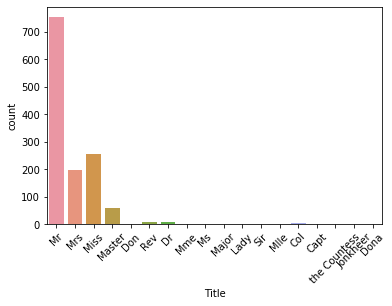

In [38]:
g = sns.countplot(x='Title', data = dataset)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [39]:
# 여러개의 title을 4개로 그룹지어보자.(어린이, 남자, 여자)
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].map({'Master':0,"Miss":1,"Ms":1,"Mme":1,"Mlle":1,"Mrs":1,"Mr":2,"Rare":3})
dataset['Title'] = dataset['Title'].astype(int)

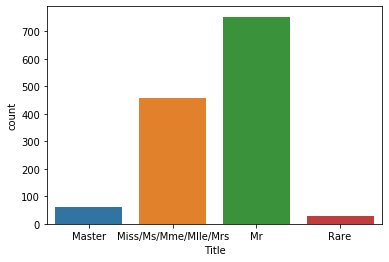

In [40]:
g = sns.countplot(dataset['Title'])
g = g.set_xticklabels(['Master','Miss/Ms/Mme/Mlle/Mrs','Mr','Rare'])

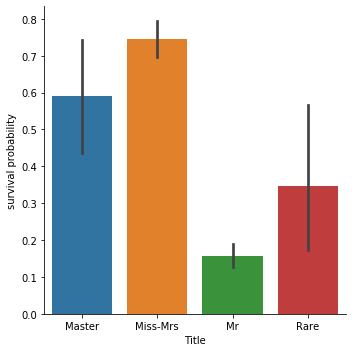

In [41]:
g = sns.catplot(x='Title', y= 'Survived', data = dataset, kind = 'bar')
g = g.set_xticklabels(['Master','Miss-Mrs','Mr','Rare'])
g = g.set_ylabels('survival probability')

Rare 타이틀을 가진 사람들의 생존률이 높다는 점이 흥미롭다.

이름에서 타이틀을 추출했으므로, 더이상 의미를 가지지 않는 Name feature는 드랍하도록 하자.

In [42]:
dataset.drop(labels=['Name'], axis = 1, inplace = True)

가족의 수가 많으면 생존률이 낮아짐을 확인하였다. 따라서, SibSp + Parch를 합친 Fsize 열을 만들어 경향을 확인해보도록 하자.

In [43]:
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] + 1

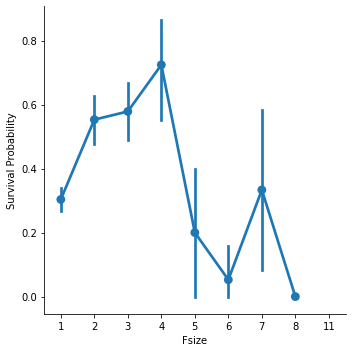

In [44]:
g = sns.catplot(x='Fsize', y='Survived', data=dataset, kind='point')
g = g.set_ylabels('Survival Probability')

가족의 크기가 클수록 생존률이 낮음을 확인할 수 있다.
가족의 크기를 4가지 범주로 나누어 확인해보면 어떨까?(아이디어)

In [45]:
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s ==1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if s ==2 else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >=5 else 0)

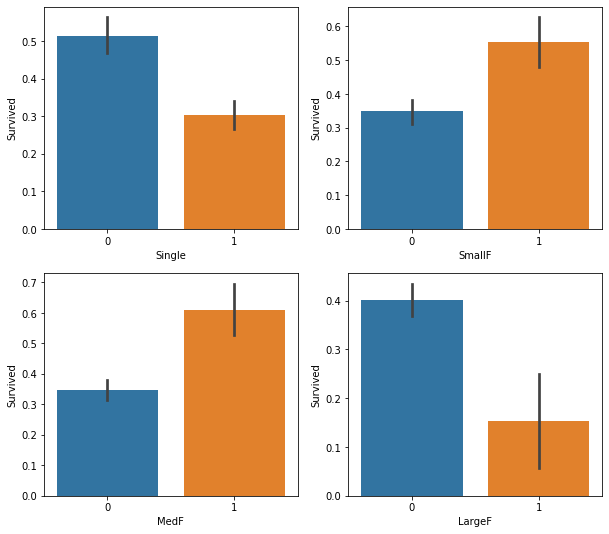

In [46]:
f, ax = plt.subplots(2,2, figsize=(10,9))
sns.barplot(x = 'Single', y='Survived', data = dataset,ax=ax[0,0])
sns.barplot(x = 'SmallF', y='Survived', data = dataset, ax=ax[0,1])
sns.barplot(x = 'MedF', y='Survived', data = dataset, ax=ax[1,0])
sns.barplot(x = 'LargeF', y='Survived', data = dataset, ax=ax[1,1])

가족이 없거나, 너무 많으면 생존율이 떨어지는 것을 확인할 수 있다.

In [47]:
dataset = pd.get_dummies(dataset, columns=['Title'])
dataset = pd.get_dummies(dataset, columns=['Embarked'], prefix = 'Em')

In [48]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,0,0,1,0,0,0,1


In [49]:
# Cabin
dataset['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [50]:
dataset['Cabin'].describe()

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [51]:
dataset['Cabin'].isnull().sum()

1007

In [52]:
dataset['Cabin'][dataset['Cabin'].notnull()].dtype

dtype('O')

In [53]:
# 객실을 배정받지 못한 사람(입석 등)은 객실번호 대신 결측치로 채워졌을지도 모른다.
# Cabin nulber의 앞 알파벳만 가져오고, 결측값은 X로 표시하자.
dataset['Cabin'] = ([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])

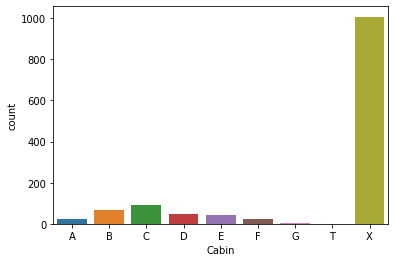

In [54]:
g = sns.countplot(dataset['Cabin'], order=['A','B','C','D','E','F','G','T','X'])

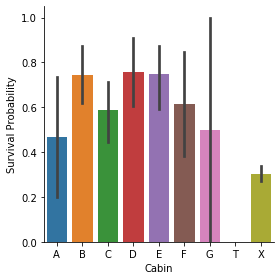

In [55]:
g = sns.catplot(y='Survived', x='Cabin',data=dataset, kind='bar', order = ['A','B','C','D','E','F','G','T','X'], height= 4)
g = g.set_ylabels('Survival Probability')

- 표준편차가 커서 다른 객실들간의 비교가 힘들다.(객실 샘플수가 적은 이유로 인해)
- 그러나 객실 정보가 있는 승객들이 그렇지 않은 승객들보다 생존률이 더 높음을 알 수 있다.(특히 B,C,D,F)

In [56]:
dataset = pd.get_dummies(dataset, columns=['Cabin'], prefix='Cabin')

#### 티켓
- 티켓의 알파벳이 같으면 클래스나 생존률이 비슷할수도 있을 것 같다. 티켓의 알파벳 부분만 남겨보도록 해보자.

In [57]:
Ticket = []

for i in list(dataset.Ticket):
    if not i.isdigit(): # 주어진 문자열 i가 숫자가 아니면
        Ticket.append(i.replace('.',"").replace('/','').strip().split(' ')[0])
    else:
        Ticket.append('X')
        
dataset['Ticket'] = Ticket
dataset['Ticket'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [58]:
dataset = pd.get_dummies(dataset, columns=['Ticket'], prefix='T')

In [59]:
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset = pd.get_dummies(dataset, columns = ['Pclass'], prefix='Pc')

In [60]:
dataset.drop(labels = ['PassengerId'], axis=1, inplace=True)

#### MODELING

In [61]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=['Survived'],axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
Y_train = train['Survived']
X_train = train.drop(labels=['Survived'], axis = 1)

## k-fold 교차검증
[데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/)

> cross_val_score(model, X, y, scoring=None, cv=None)
- model : 분석 모형
- X : 독립 변수 데이터
- y : 종속 변수 데이터
- scoring : 성능 검증에 사용할 함수 이름
- cv : 교차검증 생성기 객체 or 숫자
    - None: kFold(3)
    - 숫자 k이면 kFold(k)

In [63]:
kfold = StratifiedKFold(n_splits = 10)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

In [64]:
cv_results[:5]

[array([0.69662921, 0.70454545, 0.68181818, 0.80681818, 0.68181818,
        0.73863636, 0.71590909, 0.72727273, 0.79545455, 0.72727273]),
 array([0.71910112, 0.79545455, 0.75      , 0.82954545, 0.82954545,
        0.81818182, 0.82954545, 0.79545455, 0.82954545, 0.84090909]),
 array([0.74157303, 0.78409091, 0.75      , 0.84090909, 0.79545455,
        0.81818182, 0.84090909, 0.72727273, 0.86363636, 0.86363636]),
 array([0.78651685, 0.81818182, 0.70454545, 0.80681818, 0.81818182,
        0.82954545, 0.82954545, 0.70454545, 0.85227273, 0.85227273]),
 array([0.76404494, 0.79545455, 0.75      , 0.81818182, 0.81818182,
        0.84090909, 0.85227273, 0.71590909, 0.80681818, 0.86363636])]

In [65]:
cv_res.sort_values(by='CrossValMeans', axis = 0, ascending=False)

,CrossValMeans,CrossValerrors,Algorithm
5,0.829724,0.041959,GradientBoosting
9,0.822932,0.038751,LinearDiscriminantAnalysis
8,0.822932,0.033380,LogisticRegression
6,0.819535,0.032642,MultipleLayerPerceptron
1,0.803728,0.038004,DecisionTree
2,0.802566,0.048154,AdaBoost
4,0.802541,0.044703,ExtraTrees
3,0.800243,0.051306,RandomForest
7,0.795710,0.040837,KNeighboors
0,0.727617,0.041014,SVC


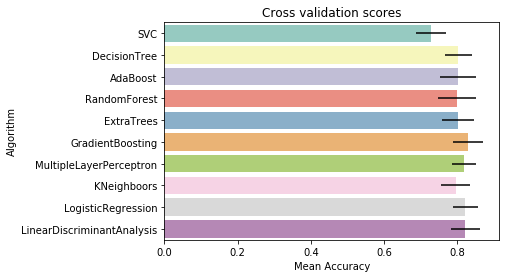

In [66]:
g = sns.barplot('CrossValMeans','Algorithm',data=cv_res,palette='Set3',orient='h',xerr=cv_std)
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

SVC, AdaBoost, RandomForest, ExtraTrees & GradientBoosting

#### Hyperparameter Tunning for the Best models

In [70]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state = 7)

ada_param_grid = {'base_estimator__criterion' : ['gini','entropy'],
                 'base_estimator__splitter':['hest','random'],
                 'algorithm':['SAMME','SAMME.R'],
                 'n_estimators':[1,2],
                 'learning_rate':[0.001, 0.001, 0.1, 0.1, 0.2, 0.3, 1.5]}

gsadaDTC = GridSearchCV(adaDTC, param_grid = ada_param_grid, cv = kfold, scoring='accuracy', n_jobs= 4, verbose=1)

gsadaDTC.fit(X_train, Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    4.2s finished


In [72]:
ada_best

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [73]:
gsadaDTC.best_score_

0.8081588355464759

# Extratreeclassifier  
(extreme randomized trees)

[jaemin408님 블로그](https://blog.naver.com/jaemin408/221826591584)

- Random Forest의 변종.
- Decision Tree를 기반으로 하되, 노트의 분할 최상의 분할을 찾으려 하지 않고, 후보의 특성을 이용해서 임의로 분할한 후 최상의 분할을 찾는 방법을 택함.
    - 최적 임계점을 찾으려하지 않기 때문에 학습시간이 훨씬 단축된다.
    
- 학습을 위한 샘플 선택시 비복원 추출 시행
    -bootstrapping이 아닌 parsting.(중복발생X)
      
      
- **임의로 정한 기준에 따라 분할하기 때문에 RF와 다르게 노이즈와 이상치에 대한 영향이 적다.**
    - 이와 같은 특성을 가지는 데이터에 대해서 뛰어난 성능을 보인다.
- 그러나 반대로 모든 feature가 연관성을 가질 때는 RF가 더 성능이 좋다.

In [75]:
ExtC = ExtraTreesClassifier()

ex_param_grid = {'max_depth':[None],
                'max_features':[1,3,10],
                'min_samples_split':[2,3,10],
                'min_samples_leaf':[1,3,10],
                'bootstrap':[False],
                'n_estimators':[100,300],
                'criterion':['gini']}

gsExtC = GridSearchCV(ExtC, param_grid=ex_param_grid, cv=kfold, scoring='accuracy', n_jobs=4, verbose = 1)

gsExtC.fit(X_train, Y_train)

ExtC_best = gsExtC.best_estimator_

gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   38.8s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   47.5s finished


0.8308605720122575

In [76]:
RFC = RandomForestClassifier()

rf_param_grid={'max_depth':[None],
              'max_features':[1,3,10],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[False],
              'n_estimators':[100,300],
              'criterion':['gini']}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring='accuracy', n_jobs = 4, verbose = 1)

gsRFC.fit(X_train, Y_train)

RFC_best = gs.RFC.best_estimator_

gs.RFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   40.4s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   50.2s finished


NameError: name 'gs' is not defined

In [ ]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [77]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   24.9s finished


0.8331332992849847